# Part I - (Dataset Exploration Title)
## by (Ebunoluwa Alabi)

## Introduction - Ford GoBike System Data
> ##### Ford GoBike System Data: This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [3]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df.shape

(183412, 16)

In [6]:
df.start_time = pd.to_datetime(df['start_time'], format='%Y-%m-%d %H:%M:%S.%f')

monthly_rides = df.groupby(pd.Grouper(key = 'start_time', freq = "M")).count().reset_index()
monthly_rides = monthly_rides[['start_time', 'bike_id']]
monthly_rides.head()
monthly_rides.sum()

/var/folders/0n/fw2y8vf50r5ct02c6qt2styw0000gn/T/ipykernel_65882/351050610.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  monthly_rides.sum()


bike_id    183412
dtype: int64

In [7]:
#clean data in preparation for visualization
df['start_time'] = pd.to_datetime(df['start_time'])

# extract hour from the timestamp column to create an time_hour column
df['time_hour'] = df['start_time'].dt.hour

df['time_hour'].value_counts()

17    21864
8     21056
18    16827
9     15903
16    14169
7     10614
19     9881
15     9174
12     8724
13     8551
10     8364
14     8152
11     7884
20     6482
21     4561
6      3485
22     2916
23     1646
0       925
5       896
1       548
2       381
4       235
3       174
Name: time_hour, dtype: int64

In [8]:
#clean data in preparation for visualization
df['start_time'] = pd.to_datetime(df['start_time'])

# extract hour from the timestamp column to create an time_hour column
df['time_day'] = df['start_time'].dt.day

df['time_day'] = df['time_day']/7

#round up values
df['time_day'] = np.round(df['time_day'])

df['time_day'].value_counts()

3.0    53469
1.0    45314
2.0    42460
4.0    29964
0.0    12205
Name: time_day, dtype: int64

In [9]:
#clean data to get member age
df['member_age'] = 2022 - df['member_birth_year']
df['member_age'].value_counts()

34.0     10236
29.0      9325
33.0      8972
32.0      8658
31.0      8498
         ...  
94.0         1
144.0        1
92.0         1
112.0        1
95.0         1
Name: member_age, Length: 75, dtype: int64

In [10]:
#check to see if station data is unique enough 
df['start_station_name'].value_counts()

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
Palm St at Willow St                                            4
21st Ave at International Blvd                                  4
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [11]:
#check the gender data
df['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

### What is the structure of your dataset?

> The data has 16 columns and 183412 rows

### What is/are the main feature(s) of interest in your dataset?

> The main features are the usage data of each user of the Ford Go Bike, the start and end time and how long the bike was used for.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I might be able to draw relationships between gender and how long they use the bikes for I might also be able to draw data on which station has the most traffic.

## Univariate Exploration


## 1. Which start station has the most traffic

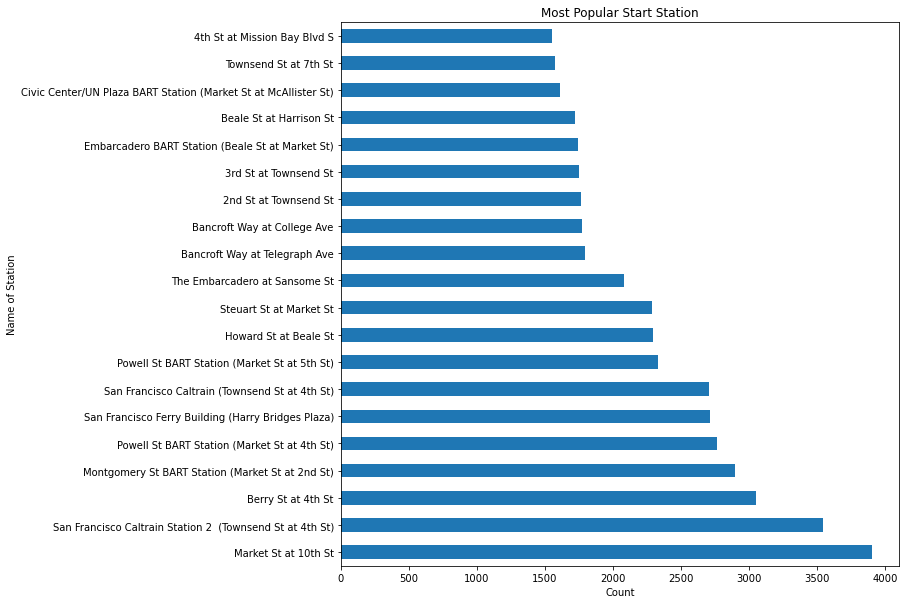

In [12]:
#Define Plot
base_color=sb.color_palette()[9]
plt.figure(figsize=(10,10))

df_start = df.groupby('start_station_name').filter(lambda x: len(x) >= 1500)
df_start ['start_station_name'].value_counts().plot(kind = 'barh')
plt.title('Most Popular Start Station')
plt.xlabel('Count')
plt.ylabel('Name of Station');


### Market St at 10th St is the busiest station, more resource allocation could be sent to the top busiest stations to improve or optimise business profit

## 2. Which hour of the day has the most traffic

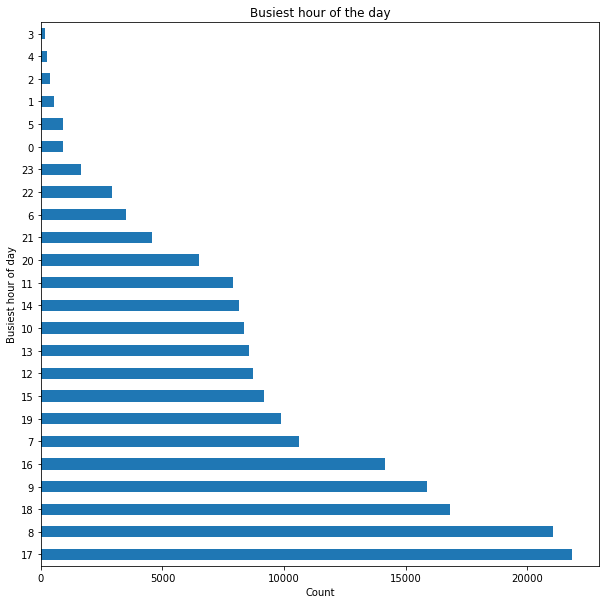

In [13]:
plt.figure(figsize=(10,10))
df_hours = df.groupby('time_hour').filter(lambda x: len(x) >= 25)
df_hours ['time_hour'].value_counts().plot(kind = 'barh')
plt.title('Busiest hour of the day')
plt.xlabel('Count')
plt.ylabel('Busiest hour of day');

### 7am - 9am and 4pm - 6pm are the busiest hours of the day with 8am and 5pm being the ultimate peak periods. To obtain this data I had to extract the  hour portion of the start time stamp and create a seperate column for it.

## 3. Which day of the week has the most traffic

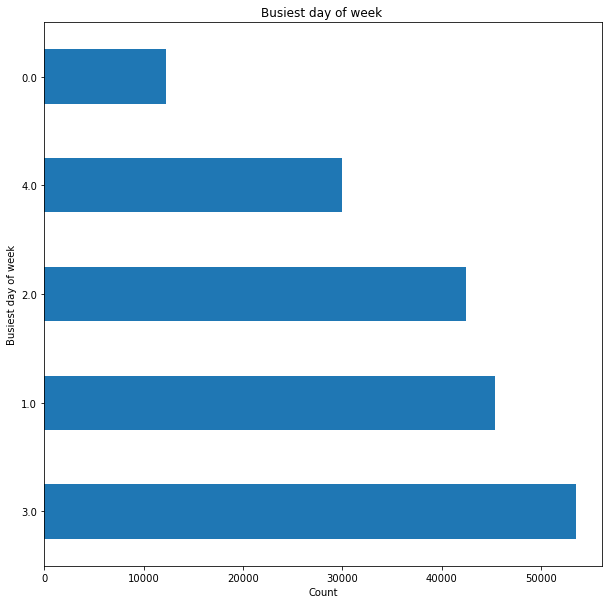

In [15]:
lt.figure(figsize=(10,10))

df_day = df.groupby('time_day').filter(lambda x: len(x) >= 25)
df_day ['time_day'].value_counts().plot(kind = 'barh')
plt.title('Busiest day of week ')
plt.xlabel('Count')
plt.ylabel('Busiest day of week');

### Wednesday is the busiest time of the week, I extracted the data from  the given time stamp.

## 4. Which end station has the most traffic

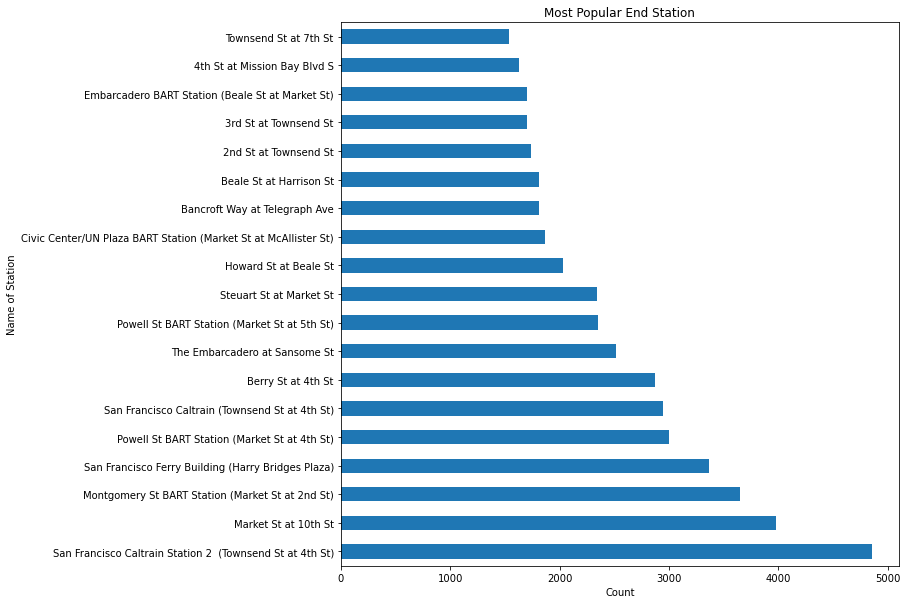

In [16]:
plt.figure(figsize=(10,10))

df_end = df.groupby('end_station_name').filter(lambda x: len(x) >= 1500)
df_end ['end_station_name'].value_counts().plot(kind = 'barh')
plt.title('Most Popular End Station')
plt.xlabel('Count')
plt.ylabel('Name of Station');

### San Francisco Caltrain Station two is the busiest end station, more resource allocation could be sent to the top busiest stations to improve or optimise business profit¶

## 5. Which gender rides bikes more

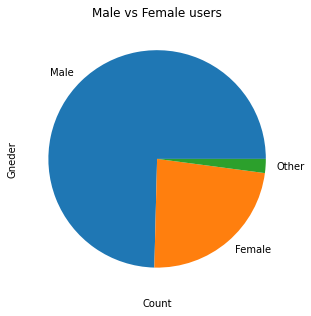

In [17]:
plt.figure(figsize=(5,5))

df_gender = df.groupby('member_gender').filter(lambda x: len(x) >= 1500)
df_gender ['member_gender'].value_counts().plot(kind = 'pie')
plt.title('Male vs Female users')
plt.xlabel('Count')
plt.ylabel('Gneder');

### More men than women ride the bikes, more marketing effort can be carried out to better target the men, and more women can be convinced to start riding bikes too

## 6. Which user type rides bikes more

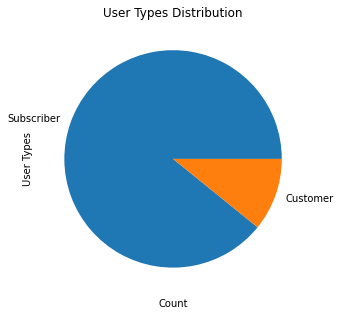

In [18]:
plt.figure(figsize=(5,5))

df_user = df.groupby('user_type').filter(lambda x: len(x) >= 1500)
df_user ['user_type'].value_counts().plot(kind = 'pie')
plt.title('User Types Distribution')
plt.xlabel('Count')
plt.ylabel('User Types');

### Most of our users are subscribers, more marketing can go into converting existing customers to subscribers.




## 7. Whats the year of birth of most riders or Most popular age

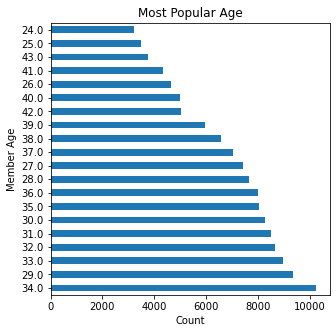

In [19]:
plt.figure(figsize=(5,5))

df_birth = df.groupby('member_age').filter(lambda x: len(x) >= 3000)
df_birth ['member_age'].value_counts().plot(kind = 'barh')
plt.title('Most Popular Age')
plt.xlabel('Count')
plt.ylabel('Member Age');

### The most popular age range seems to be betweem 29 - 34 years old. Suggesting more millenials enjoy our product. I had to extract the age from the member_birth_year column.




## 8. Do our users share rides?

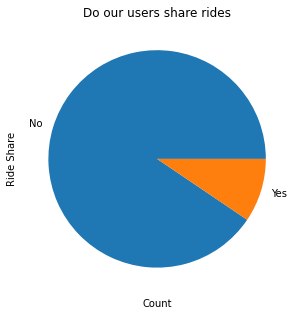

In [20]:
plt.figure(figsize=(5,5))

df_share = df.groupby('bike_share_for_all_trip').filter(lambda x: len(x) >= 3000)
df_share ['bike_share_for_all_trip'].value_counts().plot(kind = 'pie')

plt.title('Do our users share rides')
plt.xlabel('Count')
plt.ylabel('Ride Share');

#### Most of our users do not share rides 

### 9. Trip Duration Distribution

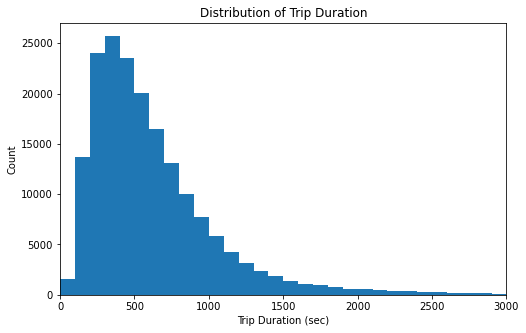

In [22]:
# start with a standard-scaled plot
binsize = 100
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins=bins)
plt.xlim(0, 3000)
plt.xlabel('Trip Duration (sec)')
plt.ylabel('Count')
plt.title('Distribution of Trip Duration')
plt.show()

### The trip duration in seconds is highly skewed to the right, showing most trips are for shorter periods than longer periods.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

## 10. Correlation between age and duration

In [23]:
numeric_vars = ['start_time', 'duration_sec', 'member_age' ]
categoric_vars = ['user_type', 'member_gender', 'time_day', 'time_hour']

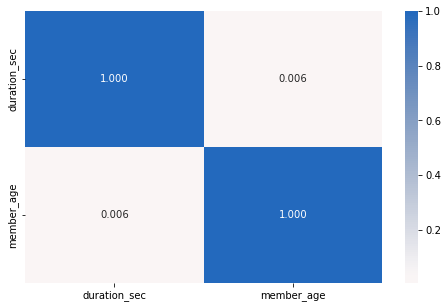

In [24]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

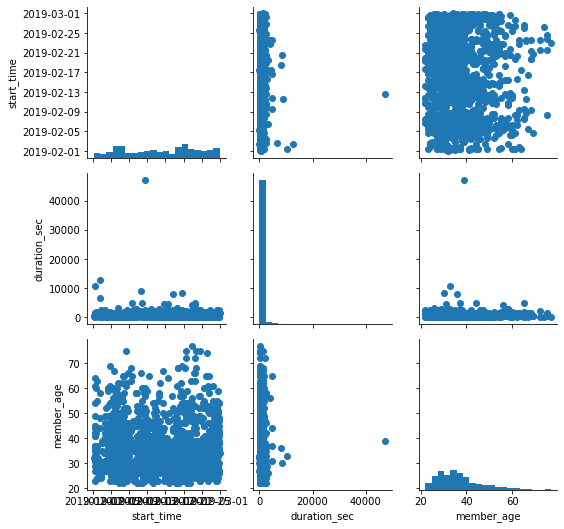

In [25]:
# plot matrix: sample 1500 trips so that plots are clearer and
# they render faster
samples = np.random.choice(df.shape[0], 1500, replace = False)
df_samp = df.loc[samples,:]

g = sb.PairGrid(data = df_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

### The duration_sec and member_age have no correlation to each other not even slightly, ideally I would have expected some correlation between age and duration, where older folks spend less time riding the bikes

## 11. Trip Duration vs Age

,member_age_bin
0,31 - 40
1,NaN
2,41 - 50
3,31 - 40
4,41 - 50


Text(0, 0.5, 'trip duration (minute)')

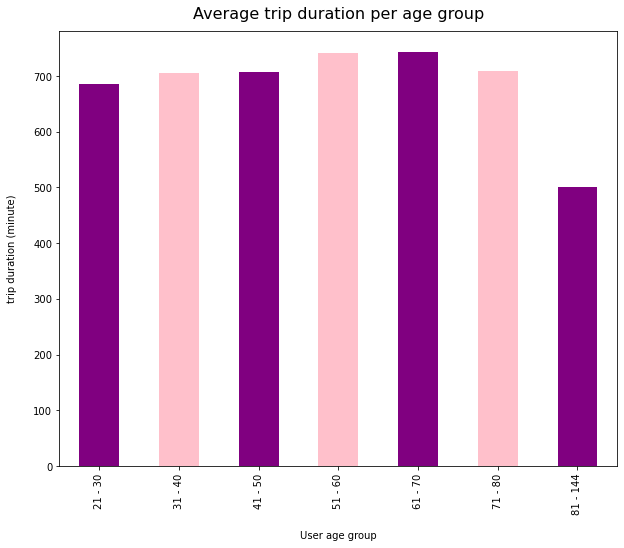

In [26]:
# create a new column member_age_bin from member_age group
max_age = str(int(df.member_age.max()))
df['member_age_bin'] = df['member_age'].apply(lambda x: '10 - 20' if 10<x<=20 else 
                                                  '21 - 30' if 20<x<=30 else
                                                  '31 - 40' if 30<x<=40 else 
                                                  '41 - 50' if 40<x<=50 else
                                                  '51 - 60' if 50<x<=60 else
                                                  '61 - 70' if 60<x<=70 else
                                                  '71 - 80' if 70<x<=80 else
                                                  '81 - '+max_age if 80<x<=float(max_age) else x)

# test
display(df[['member_age_bin']].head())

color=['purple', 'pink']
df.groupby('member_age_bin')['duration_sec'].mean().plot(kind='bar', color=color, figsize=(10,8))
plt.title('Average trip duration per age group', fontsize=16, y=1.015)
plt.xlabel('User age group', labelpad=16)
plt.ylabel('trip duration (minute)', labelpad=16)

### It appears that the age group 61-70 years old spend more time riding the bikes, although I would have expected the younger age group to be more active.

## 12. Is the Average trip taken dependent on user type?

,user_type,duration_sec
0,Customer,1432.465019
1,Subscriber,640.263678


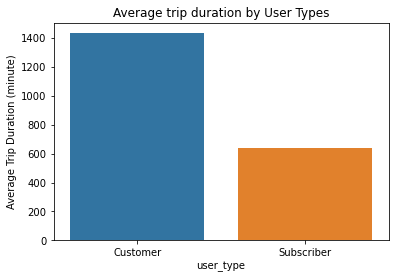

In [29]:
# Average trip duration mean plot
grouped_user_duration = df[['user_type','duration_sec']].groupby(['user_type'],as_index= False).mean()

display(grouped_user_duration)

sb.barplot(x='user_type', y='duration_sec', data=grouped_user_duration)
plt.title("Average trip duration by User Types")
plt.ylabel("Average Trip Duration (minute)")
plt.show()

### Suprisingly more customers user the bikses than subscribers.  I would have expected that subscribers would be more active.

## 13.  How does gender relate to average trip taken?

,member_gender,duration_sec
0,Female,779.070390
1,Male,672.639069
2,Other,996.515334


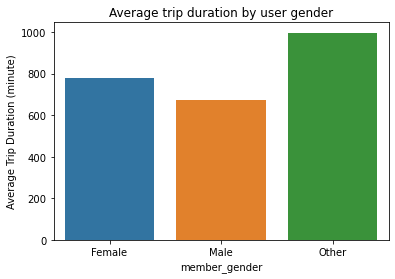

In [30]:
# Average trip duration mean plot
grouped_gender_duration = df[['member_gender','duration_sec']].groupby(['member_gender'],as_index= False).mean()
# show analysis
display(grouped_gender_duration)

sb.barplot(x='member_gender', y='duration_sec', data=grouped_gender_duration)
plt.title("Average trip duration by user gender")
plt.ylabel("Average Trip Duration (minute)")
plt.show()

### Quite interestingly, even though there are way more men than women, women still use the bikes for a more time than men.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

## 14. Daily average trip based on user age

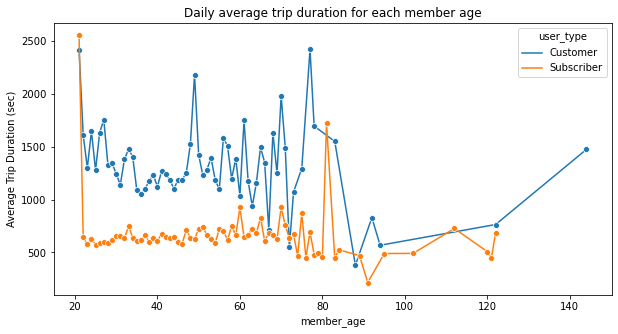

In [31]:
user_avg_min = df.groupby(['user_type','member_age']).duration_sec.mean()
user_avg_min = user_avg_min.reset_index()

# plot a line plot with colors based on user_type
plt.figure(figsize=[10,5])
sb.lineplot(data = user_avg_min, x='member_age', y='duration_sec', hue='user_type', marker='o')
plt.title("Daily average trip duration for each member age")
plt.ylabel('Average Trip Duration (sec)');

### On average customers ride a lot more than subcribers and for both groups users about 80 years of age use the bikes more

## 15. Time of day vs user types

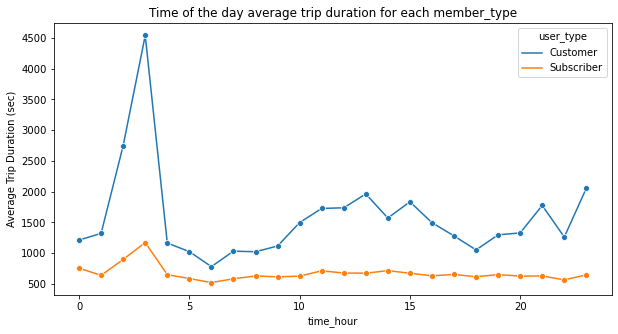

In [32]:
user_daytime_avg = df.groupby(['user_type','time_hour']).duration_sec.mean()
user_daytime_avg= user_daytime_avg.reset_index()

# plot a line plot with colors based on user_type
plt.figure(figsize=[10,5])
sb.lineplot(data = user_daytime_avg, x='time_hour', y='duration_sec', hue='user_type', marker='o')
plt.title("Time of the day average trip duration for each member_type")
plt.ylabel('Average Trip Duration (sec)');

### Its a bit interesting that customers use the bike a lot more before 5am  and between 5pm - 4pm there is another peak.

## Conclusions

>I was interested in finding out the peak periods, the top users by user time and also the consumer behavior, How long do they ride for and when do they ride the most. I believe that these are useful insights for any business in expanding its marketing efforts or better understanding consumer analystics in general.

